In [12]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
client = Client()
client

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:36588 Dashboard: http://127.0.0.1:36982/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [5]:
input_path_mod = '/g/data/e14/erd561/access-om2/'

output_path = '/g/data/e14/erd561/access-om2/'

lonW = 90
lonE = 180

latS = -70
latN = 20

year = np.arange(1993,2018,1)

tstart = exptdata.clim_tstart
tend = exptdata.clim_tend

In [ ]:
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
print(tstart)
print(tend)
print(expt)
print(n_files)
print(time_units)
print(offset)

sst_1 = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=None,
                        time_units='days since 1658-01-01', offset=offset).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW-360,lonE-360)).\
                        sel(yt_ocean=slice(latS,latN)).\
                        sel(time=slice(
                        '1933-01-01 00:00:00',
                        '1958-01-01 00:00:00'))


sst_1.load()
print(sst_1)

1993-01-01 00:00:00
2018-01-01 00:00:00
1deg_jra55v13_iaf_spinup1_B1
-12
days since 1718-01-01
-87658
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


In [ ]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
sst_025 = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=None,
                        time_units=time_units, offset=offset).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW-360,lonE-360)).\
                        sel(yt_ocean=slice(latS,latN)).\
                        sel(time=slice(
                        '1933-01-01 00:00:00',
                        '1958-01-01 00:00:00'))
sst_025.load()
print(sst_025)

In [6]:
time_units = 'days since 0001-01-01'
print(time_units)

sst_JRA_month = cc.get_nc_variable('01deg_jra55v13_ryf8485_spinup6', 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, time_units=time_units).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW-360,lonE-360)).\
                        sel(yt_ocean=slice(latS,latN))
sst_JRA_month.load()


sst_JRA1 = sst_JRA_month.isel(time=slice(334,418)).\
                        groupby('time.year').mean('time', skipna=True)-273.15
sst_JRA1 = sst_JRA1.assign_coords(year = sst_JRA1.year.values + 1944)
print(sst_JRA1.year.values)



sst_JRA2 = sst_JRA_month.isel(time=slice(446,482))
sst_JRA2 = sst_JRA2.assign_coords(time = pd.to_datetime(sst_JRA2.time.values))
sst_JRA2 = sst_JRA2.groupby('time.year').mean('time', skipna=True)-273.15
print(sst_JRA2.year.values)
sst_JRA2 = sst_JRA2.assign_coords(year = sst_JRA2.year.values + 44)
print(sst_JRA2.year.values)



sst_JRA = xr.concat([sst_JRA1, sst_JRA2], dim='year')
print(sst_JRA)

days since 0001-01-01
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


<xarray.DataArray 'temp' (time: 550, yt_ocean: 1186, xt_ocean: 900)>
array([[[      nan,       nan, ..., 273.27216, 273.24295],
        [      nan,       nan, ..., 273.2953 , 273.2697 ],
        ...,
        [298.39914, 298.35596, ..., 298.18048, 298.17993],
        [298.32535, 298.24725, ..., 298.14655, 298.14606]],

       [[      nan,       nan, ..., 271.43173, 271.42236],
        [      nan,       nan, ..., 271.44727, 271.43585],
        ...,
        [300.29285, 300.26303, ..., 297.91116, 297.90796],
        [300.23734, 300.19537, ..., 297.8726 , 297.87396]],

       ...,

       [[      nan,       nan, ..., 271.3838 , 271.38263],
        [      nan,       nan, ..., 271.38025, 271.37616],
        ...,
        [300.34058, 300.42587, ..., 300.09186, 300.10754],
        [300.18173, 300.26782, ..., 300.03754, 300.05826]],

       [[      nan,       nan, ..., 271.46555, 271.46616],
        [      nan,       nan, ..., 271.468  , 271.46844],
        ...,
        [297.72952, 297.73257, ...

In [ ]:
lat_1 = sst_1.yt_ocean
lon_1 = sst_1.xt_ocean

sst_1_trans = sst_1
print(np.shape(sst_1_trans))
sst_1_slopes = xr.DataArray(
    np.zeros([np.shape(lat_1)[0], np.shape(lon_1)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1, lon_1], name='sst_1')
for iid, i in enumerate(lat_1):
    for jid, j in enumerate(lon_1):
        sst_1_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(year, sst_1_trans[:, iid, jid])
    print('lat_1 ' + str(np.array(i)))
print(sst_1_slopes)

In [ ]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

fig = plt.figure(figsize=(7.48,9.06)) 
matplotlib.rcParams.update({'font.size': 12}) 

ax = plt.axes(projection=ccrs.PlateCarree())

levels=arange(-0.06,0.06,0.01)

plt.contourf(lon_1+360, lat_1, sst_1_slopes, levels=levels, extend='both',
             cmap=plt.cm.seismic, transform=ccrs.PlateCarree())
plt.colorbar()

ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)



In [ ]:
lat_025 = sst_025.yt_ocean
lon_025 = sst_025.xt_ocean

sst_025_trans = sst_025
print(np.shape(sst_025_trans))
sst_025_slopes = xr.DataArray(
    np.zeros([np.shape(lat_025)[0], np.shape(lon_025)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025, lon_025], name='sst_025')
for iid, i in enumerate(lat_025):
    for jid, j in enumerate(lon_025):
        sst_025_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(year, sst_025_trans[:, iid, jid])
    print('lat_025 ' + str(np.array(i)))
print(sst_025_slopes)

In [ ]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

fig = plt.figure(figsize=(7.48,9.06)) 
matplotlib.rcParams.update({'font.size': 12}) 

ax = plt.axes(projection=ccrs.PlateCarree())

levels=arange(-0.06,0.06,0.01)

plt.contourf(lon_025+360, lat_025, sst_025_slopes, levels=levels, extend='both',
             cmap=plt.cm.seismic, transform=ccrs.PlateCarree())
plt.colorbar()

ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

In [32]:
lat_JRA = sst_JRA.yt_ocean
lon_JRA = sst_JRA.xt_ocean

decade = sst_JRA.year
print(decade)
sst_JRA_trans = sst_JRA
print(np.shape(sst_JRA_trans))
sst_JRA_slopes = xr.DataArray(
    np.zeros([np.shape(lat_JRA)[0], np.shape(lon_JRA)[0]]), dims=(
    'lat_JRA', 'lon_JRA'), coords=[lat_JRA, lon_JRA], name='sst_JRA')
for iid, i in enumerate(lat_JRA):
    for jid, j in enumerate(lon_JRA):
        sst_JRA_slopes[iid, jid], _, _, _, _ = \
        stats.linregress(decade, sst_JRA_trans[:, iid, jid])
    print('lat_JRA ' + str(np.array(i)))
print(sst_JRA_slopes)

<xarray.DataArray 'year' (year: 10)>
array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984])
Coordinates:
    st_ocean  float64 0.5413
  * year      (year) int64 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
(10, 1186, 900)
lat_JRA -69.99968147628742
lat_JRA -69.95744212190694
lat_JRA -69.91520276752645
lat_JRA -69.87296341314597
lat_JRA -69.83072405876548
lat_JRA -69.788484704385
lat_JRA -69.74624535000451
lat_JRA -69.70400599562403
lat_JRA -69.66176664124355
lat_JRA -69.61952728686306
lat_JRA -69.57728793248258
lat_JRA -69.53504857810209
lat_JRA -69.49280922372161
lat_JRA -69.45056986934112
lat_JRA -69.40833051496064
lat_JRA -69.36609116058015
lat_JRA -69.32385180619967
lat_JRA -69.28161245181919
lat_JRA -69.2393730974387
lat_JRA -69.19713374305822
lat_JRA -69.15489438867773
lat_JRA -69.11265503429725
lat_JRA -69.07041567991676
lat_JRA -69.02817632553628
lat_JRA -68.9859369711558
lat_JRA -68.94369761677531
lat_JRA -68.90145826239483
lat_JRA -68.85921890801434
lat_JRA 

lat_JRA -56.47328717333905
lat_JRA -56.4180143533965
lat_JRA -56.3626612446767
lat_JRA -56.307227506731984
lat_JRA -56.251713349239004
lat_JRA -56.196118432962265
lat_JRA -56.14044296719873
lat_JRA -56.08468661392767
lat_JRA -56.02884958207567
lat_JRA -55.972931534839404
lat_JRA -55.9169326807844
lat_JRA -55.86085268432745
lat_JRA -55.80469175368236
lat_JRA -55.74844955448877
lat_JRA -55.69212629461818
lat_JRA -55.63572164093582
lat_JRA -55.579235800980285
lat_JRA -55.52266844284527
lat_JRA -55.46601977374587
lat_JRA -55.40928946300711
lat_JRA -55.352477717530064
lat_JRA -55.295584207874
lat_JRA -55.23860914063544
lat_JRA -55.18155218761087
lat_JRA -55.124413555101775
lat_JRA -55.067192916144876
lat_JRA -55.00989047675615
lat_JRA -54.95250591121559
lat_JRA -54.89503942526325
lat_JRA -54.83749069442549
lat_JRA -54.77985992417602
lat_JRA -54.722146791290726
lat_JRA -54.66435150098657
lat_JRA -54.60647373129214
lat_JRA -54.54851368717732
lat_JRA -54.49047104792663
lat_JRA -54.432346018272

lat_JRA -35.93272220128377
lat_JRA -35.85171002581527
lat_JRA -35.77061508958916
lat_JRA -35.689437282672614
lat_JRA -35.60817687131681
lat_JRA -35.52683374746036
lat_JRA -35.4454081784647
lat_JRA -35.36390005814284
lat_JRA -35.28230965497398
lat_JRA -35.200636864648395
lat_JRA -35.11888195677047
lat_JRA -35.037044828910574
lat_JRA -34.95512575180556
lat_JRA -34.8731246249086
lat_JRA -34.79104172009625
lat_JRA -34.70887693870714
lat_JRA -34.626630553764656
lat_JRA -34.54430246849541
lat_JRA -34.46189295707665
lat_JRA -34.379401924625455
lat_JRA -34.29682964647985
lat_JRA -34.214176029649764
lat_JRA -34.131441350640834
lat_JRA -34.048625518358115
lat_JRA -33.96572881048159
lat_JRA -33.88275113781365
lat_JRA -33.79969277921524
lat_JRA -33.716553647388174
lat_JRA -33.63333402238091
lat_JRA -33.55003381879667
lat_JRA -33.46665331787785
lat_JRA -33.38319243613102
lat_JRA -33.29965145599879
lat_JRA -33.2160302958929
lat_JRA -33.1323292394624
lat_JRA -33.04854820702588
lat_JRA -32.96468748344

lat_JRA -8.716189670725734
lat_JRA -8.617331449874465
lat_JRA -8.51844745017845
lat_JRA -8.419537805456535
lat_JRA -8.32060295792327
lat_JRA -8.221643042230964
lat_JRA -8.122658501262137
lat_JRA -8.023649470484466
lat_JRA -7.9246163934340474
lat_JRA -7.825559406375718
lat_JRA -7.726478953484649
lat_JRA -7.627375171804533
lat_JRA -7.528248506135005
lat_JRA -7.429099094280208
lat_JRA -7.329927381649533
lat_JRA -7.230733506789073
lat_JRA -7.131517915703162
lat_JRA -7.032280747661243
lat_JRA -6.933022449247692
lat_JRA -6.8337431604366055
lat_JRA -6.734443328377402
lat_JRA -6.6351230937300505
lat_JRA -6.535782904193916
lat_JRA -6.436422901095965
lat_JRA -6.337043532670333
lat_JRA -6.237644940892019
lat_JRA -6.13822757451466
lat_JRA -6.038791576142244
lat_JRA -5.939337395032555
lat_JRA -5.839865174399441
lat_JRA -5.740375363989399
lat_JRA -5.640868107606927
lat_JRA -5.541343855471719
lat_JRA -5.441802751959639
lat_JRA -5.342245247747981
lat_JRA -5.242671487764618
lat_JRA -5.143081923128776
l

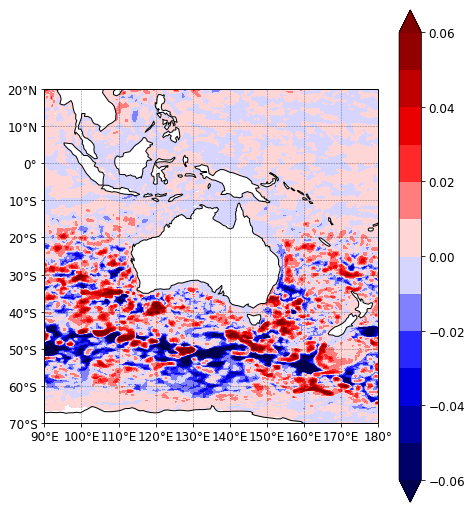

In [36]:
land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

fig = plt.figure(figsize=(7.48,9.06)) 
matplotlib.rcParams.update({'font.size': 12}) 

ax = plt.axes(projection=ccrs.PlateCarree())

levels=arange(-0.06,0.06,0.01)

plt.contourf(lon_JRA+360, lat_JRA, sst_JRA_slopes, levels=levels, extend='both',
             cmap=plt.cm.seismic, transform=ccrs.PlateCarree())
plt.colorbar()

ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

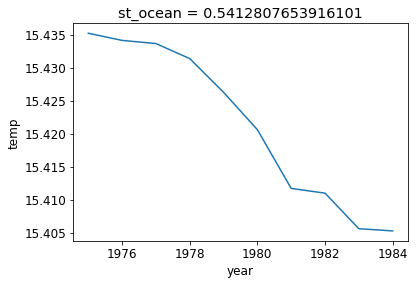

In [37]:
sst_JRA.mean('xt_ocean').mean('yt_ocean').plot()

In [38]:
# sst_1_xr = xr.DataArray(sst_1.transpose('yt_ocean', 'xt_ocean', 'time'), name='sst_1',
#                         coords=[lat_1, lon_1, year], 
#                         dims=['yt_ocean', 'xt_ocean', 'time'])
# print(sst_1_xr)
# sst_1_xr.to_netcdf(output_path + 'sst_1_C4.nc')

# sst_1_slopes_xr = xr.DataArray(sst_1_slopes, name='sst_1_slopes',
#                         coords=[lat_1, lon_1], 
#                         dims=['yt_ocean', 'xt_ocean'])
# print(sst_1_slopes_xr)
# sst_1_slopes_xr.to_netcdf(output_path + 'sst_1_slopes_C4.nc')



# sst_025_xr = xr.DataArray(sst_025.transpose('yt_ocean', 'xt_ocean', 'time'), name='sst_025',
#                         coords=[lat_025, lon_025, year], 
#                         dims=['yt_ocean', 'xt_ocean', 'time'])
# print(sst_025_xr)
# sst_025_xr.to_netcdf(output_path + 'sst_025_C4.nc')

# sst_025_slopes_xr = xr.DataArray(sst_025_slopes, name='sst_025_slopes',
#                         coords=[lat_025, lon_025], 
#                         dims=['yt_ocean', 'xt_ocean'])
# print(sst_025_slopes_xr)
# sst_025_slopes_xr.to_netcdf(output_path + 'sst_025_slopes_C4.nc')



sst_JRA_xr = xr.DataArray(sst_JRA.transpose('yt_ocean', 'xt_ocean', 'year'), name='sst_JRA',
                        coords=[lat_JRA, lon_JRA, decade], 
                        dims=['yt_ocean', 'xt_ocean', 'year'])
print(sst_JRA_xr)
sst_JRA_xr.to_netcdf(output_path + 'sst_JRA.nc')

sst_JRA_slopes_xr = xr.DataArray(sst_JRA_slopes, name='sst_JRA_slopes',
                        coords=[lat_JRA, lon_JRA], 
                        dims=['yt_ocean', 'xt_ocean'])
print(sst_JRA_slopes_xr)
sst_JRA_slopes_xr.to_netcdf(output_path + 'sst_JRA_slopes.nc')

<xarray.DataArray 'sst_JRA' (yt_ocean: 1186, xt_ocean: 900, year: 10)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.742767, -1.740509, ..., -1.734375, -1.734894],
        [-1.740967, -1.737701, ..., -1.733887, -1.734161]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.74646 , -1.744202, ..., -1.731903, -1.736267],
        [-1.745728, -1.741699, ..., -1.732941, -1.735687]],

       ...,

       [[27.279053, 27.352661, ..., 27.475037, 27.501404],
        [27.281006, 27.354645, ..., 27.466553, 27.497742],
        ...,
        [26.445312, 26.476654, ..., 26.332947, 26.501526],
        [26.431702, 26.472626, ..., 26.320984, 26.497375]],

       [[27.213806, 27.321655, ..., 27.43103 , 27.443237],
        [27.21634 , 27.319397, ..., 27.434692, 27.416595],
        ...,
        [26.417572, 26.442963, .